In [12]:
import sys

import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
train = pd.read_csv('data/house-prices/train.csv', index_col=['Id'])
test = pd.read_csv('data/house-prices/test.csv', index_col=['Id'])

In [14]:
del test

In [15]:
train.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [16]:
!head -25 data/house-prices/data_description.txt

'head' is not recognized as an internal or external command,
operable program or batch file.


In [17]:
train.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

c:\users\alexander~\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


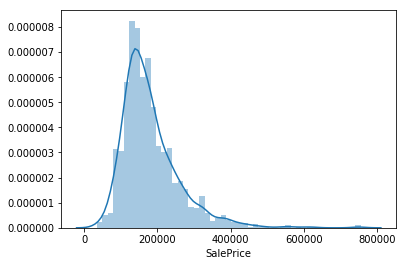

In [18]:
sns.distplot(train.SalePrice)

In [19]:
from sklearn.model_selection import train_test_split

train_no_sale_price = train.drop(labels=['SalePrice'], axis=1)
train_sale_price = train['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(train_no_sale_price, 
                                                    train_sale_price, 
                                                    test_size=0.3, 
                                                    random_state=4330)

In [20]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

ValueError: could not convert string to float: 'Abnorml'

In [21]:
print((x_train.values == 'Abnorml').sum())

col_idx = pd.np.argmax(x_train.values == 'Abnorml', axis=1).max()

x_train.iloc[:, col_idx].value_counts()

76


Normal     825
Partial     96
Abnorml     76
Family      16
Alloca       7
AdjLand      2
Name: SaleCondition, dtype: int64

In [22]:
x_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1022.000000,851.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1018.000000,1022.000000,1022.000000,...,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,58.414873,70.177438,10735.380626,6.073386,5.545988,1971.486301,1984.690802,105.416503,443.613503,45.534247,...,478.014677,91.718200,48.040117,21.546967,3.934442,14.780822,3.440313,39.080235,6.277886,2007.829746
std,44.416250,26.131482,11344.844137,1.373991,1.096401,30.262989,20.737629,181.973221,464.425961,155.139109,...,212.612947,125.674902,68.896801,58.997097,32.831010,55.423160,45.265717,335.892594,2.731375,1.333798
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7564.250000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,...,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,70.000000,9544.500000,6.000000,5.000000,1972.500000,1993.500000,0.000000,380.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11616.000000,7.000000,6.000000,2001.000000,2004.000000,168.750000,719.750000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,318.000000,508.000000,480.000000,738.000000,8300.000000,12.000000,2010.000000


In [23]:
pd.options.display.max_columns = 36
pd.options.display.max_rows = 10

In [24]:
numeric_column_names = x_train.describe().columns
print(numeric_column_names)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [25]:
regressor.fit(x_train[numeric_column_names], y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [26]:
x_train[numeric_column_names].isnull().sum().sort_values()

MSSubClass        0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
               ... 
BsmtFinSF2        0
YrSold            0
MasVnrArea        4
GarageYrBlt      49
LotFrontage     171
Length: 36, dtype: int64

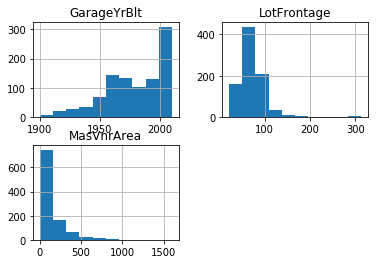

In [27]:
x_train[['LotFrontage','GarageYrBlt', 'MasVnrArea']].hist();

In [28]:
x_train[numeric_column_names] = x_train[numeric_column_names].fillna(0)

c:\users\alexander~\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [29]:
x_train[numeric_column_names].isnull().sum(axis=0).value_counts()

0    36
dtype: int64

In [30]:
regressor.fit(x_train[numeric_column_names], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
regressor.score(x_train[numeric_column_names], y_train)

0.798126366530339

[ 94546.59021574 319548.4326495  140270.63909418 224453.01768405
 236313.23539591 164261.63064394  86677.32797052 254333.97137667]


c:\users\alexander~\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


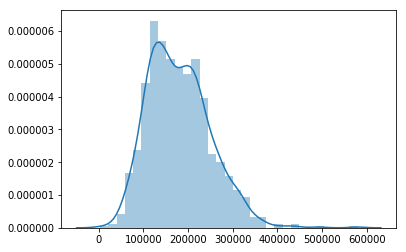

In [32]:
predictions = regressor.predict(x_train[numeric_column_names])

print(predictions[:8])

sns.distplot(predictions);

In [33]:
differences = (predictions - y_train).round(0)
print(differences[:8])

Id
128      7547.0
878    -30452.0
880      3771.0
163      4453.0
1181   -13687.0
853       262.0
77     -49073.0
603     34334.0
Name: SalePrice, dtype: float64


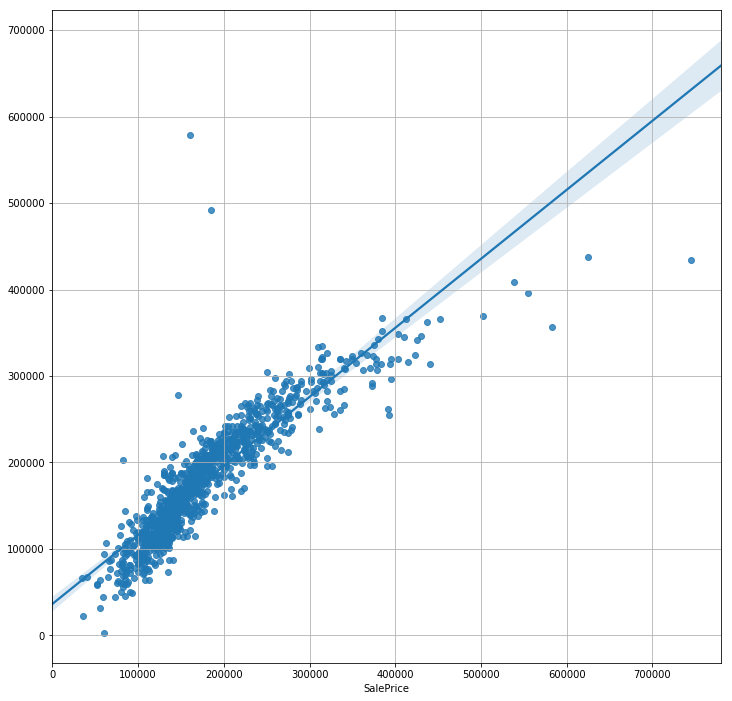

In [34]:
plt.figure(figsize=(12,12))
sns.regplot(y_train, predictions)
plt.grid(True)
plt.show()

In [35]:
x_test[numeric_column_names].isnull().sum().sort_values(ascending=False)[:4]

LotFrontage    88
GarageYrBlt    32
MasVnrArea      4
YrSold          0
dtype: int64

In [36]:
x_test[numeric_column_names] = x_test[numeric_column_names].fillna(0)

c:\users\alexander~\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


c:\users\alexander~\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


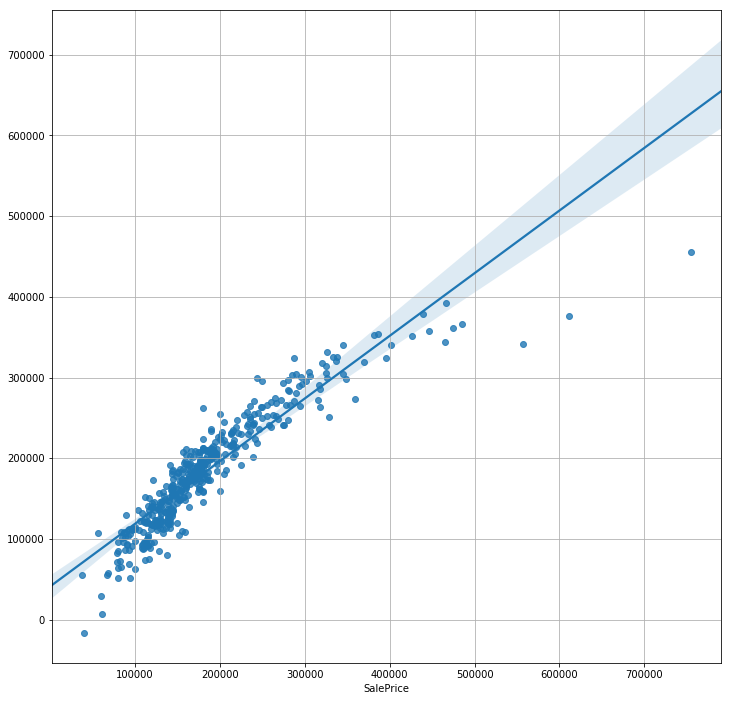

In [37]:
predictions_test = regressor.predict(x_test[numeric_column_names])
plt.figure(figsize=(12,12))
sns.regplot(y_test, predictions_test)
plt.grid(True)
plt.show()

In [38]:
pd.options.display.max_rows = 10
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [39]:
categorical_columns = train.dtypes[train.dtypes == 'object'].index
print(categorical_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [40]:
from sklearn.preprocessing import LabelEncoder


In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
train = train.fillna("")
encoders = {col: LabelEncoder().fit(train[col]) for col in categorical_columns}

print(encoders['MSZoning'].classes_)
print(encoders['Street'].classes_)

['C (all)' 'FV' 'RH' 'RL' 'RM']
['Grvl' 'Pave']


In [43]:
def encode_categorical(data, columns, encoders):
    data = data.fillna("")
    return pd.DataFrame({col: encoders[col].transform(data[col]) for col in columns},
                        index = data.index)

train_encoded = encode_categorical(train, categorical_columns, encoders)

pd.options.display.max_columns=12
train_encoded.head(8)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,...,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,
1,3,1,0,3,3,0,...,2,0,0,0,8,4
2,3,1,0,3,3,0,...,2,0,0,0,8,4
3,3,1,0,0,3,0,...,2,0,0,0,8,4
4,3,1,0,0,3,0,...,2,0,0,0,8,0
5,3,1,0,0,3,0,...,2,0,0,0,8,4
6,3,1,0,0,3,0,...,2,0,3,3,8,4
7,3,1,0,3,3,0,...,2,0,0,0,8,4
8,3,1,0,0,3,0,...,2,0,0,3,8,4


In [44]:
one_hot_encoder = OneHotEncoder().fit(train_encoded)

print(one_hot_encoder.transform(train_encoded).todense())
print(one_hot_encoder.transform(train_encoded).shape)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(1460, 268)


c:\users\alexander~\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [45]:
from sklearn.linear_model import LinearRegression 

one_hot_x_train = one_hot_encoder.transform(encode_categorical(x_train[categorical_columns], categorical_columns, encoders))

cat_regression = LinearRegression().fit(one_hot_x_train, y_train)
print(cat_regression.score(one_hot_x_train, y_train))

one_hot_x_test = one_hot_encoder.transform(encode_categorical(x_test[categorical_columns], categorical_columns, encoders))
print(cat_regression.score(one_hot_x_test, y_test))

0.8770468421965841
0.7430500002535577


In [46]:
x_train[numeric_column_names].shape, one_hot_x_train.shape

((1022, 36), (1022, 268))

In [47]:
new_x_train = pd.np.concatenate([one_hot_x_train.todense(), x_train[numeric_column_names]], axis=1)
new_x_test = pd.np.concatenate([one_hot_x_test.todense(), x_test[numeric_column_names]], axis=1)
print(new_x_train.shape, new_x_test.shape)

(1022, 304) (438, 304)


In [48]:
all_data_lr = LinearRegression().fit(new_x_train, y_train)
print(all_data_lr.score(new_x_train, y_train))
print(all_data_lr.score(new_x_test, y_test))

0.937477551466238
-14486294.82247347


In [49]:
from sklearn.linear_model import Ridge

alpha = [0.01, 0.1, 1, 10, 100]

In [50]:
for a in alpha:
    all_data_lr = Ridge(alpha = a).fit(new_x_train, y_train)
    print('alpha:', a)
    print(all_data_lr.score(new_x_train, y_train), all_data_lr.score(new_x_test, y_test))
    print()

alpha: 0.01
0.9374607177132872 0.8488214740142117

alpha: 0.1
0.9364454642419523 0.8596282428267884

alpha: 1
0.9227360656014942 0.8824267159987822

alpha: 10
0.8933107135132801 0.8922404784820493

alpha: 100
0.8524424288746796 0.8821692100273281



c:\users\alexander~\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


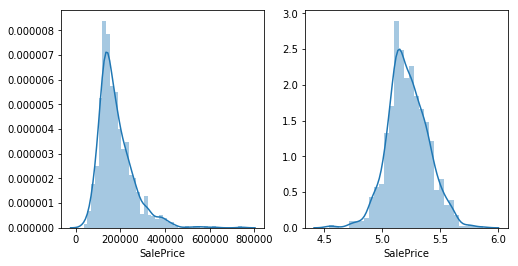

In [51]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.distplot(y_train)
plt.subplot(1, 2, 2)
sns.distplot(pd.np.log10(y_train))

In [52]:
all_data_lr = LinearRegression().fit(new_x_train, pd.np.log10(y_train))
print(all_data_lr.score(new_x_train, pd.np.log10(y_train)))
print(all_data_lr.score(new_x_test, pd.np.log10(y_test)))

# Предишни резултати: 
# трейн: 0.893310713513
# тест: 0.892240478482

0.94401032158974
-36339035.01464747


In [53]:
alphas = [0.01, 0.1, 1, 10, 100]
for alpha in alphas:
    all_data_lr = Ridge(alpha = alpha).fit(new_x_train, pd.np.log10(y_train))
    print('alpha:', alpha)
    print(all_data_lr.score(new_x_train, pd.np.log10(y_train)), all_data_lr.score(new_x_test, pd.np.log10(y_test)))
    print()

alpha: 0.01
0.9439975012519928 0.8983736949620211

alpha: 0.1
0.9432298317185679 0.90599589363626

alpha: 1
0.9341947544847011 0.9186587324988607

alpha: 10
0.9145728136422794 0.9257768879730852

alpha: 100
0.8856716730211228 0.9220580063440621



In [54]:
from sklearn.metrics import r2_score

for alpha in [0.01, 0.1, 1, 10, 100]:
    all_data_lr = Ridge(alpha = alpha).fit(new_x_train, pd.np.log10(y_train))
    print('alpha:', alpha)
    print(r2_score(10**all_data_lr.predict(new_x_train), y_train))
    print(r2_score(10**all_data_lr.predict(new_x_test), y_test))
    print()

alpha: 0.01
0.944147892685011
0.9200310518232425

alpha: 0.1
0.9425416281432226
0.9205276433543479

alpha: 1
0.9260860943327635
0.9173292152828885

alpha: 10
0.879718307164683
0.9148599716825777

alpha: 100
0.7818037375981814
0.8915250744393394



In [55]:
print(r2_score(y_train, 10**all_data_lr.predict(new_x_train)))
print(r2_score(y_test, 10**all_data_lr.predict(new_x_test)))

0.8184738234101541
0.9171163967347304


In [56]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
clf = DecisionTreeRegressor().fit(new_x_train, pd.np.log10(y_train))
print(clf.score(new_x_train, pd.np.log10(y_train)))
print(clf.score(new_x_test, pd.np.log10(y_test)))

#тук overfit-а е голям. Да пробваме с Random Forest.

0.9999999585744843
0.7237031543813655


In [68]:
from sklearn.ensemble import RandomForestRegressor
randomForestRegressor = RandomForestRegressor(n_estimators=100,max_depth=15, random_state=137)
rf = randomForestRegressor.fit(new_x_train, pd.np.log10(y_train))
print(rf.score(new_x_train, pd.np.log10(y_train)))
print(rf.score(new_x_test, pd.np.log10(y_test)))
# Имаме значително подобрение, в сравнение с DecisionTreeRegressor. Да опитаме да намалим overfit-a чрез регуляризация.

0.9733275409279054
0.8691524111493896
304


In [70]:
# Да видим броя на фичърите, когато изпълняваме fit
print(rf.n_features_)

304


In [72]:
#По default параметъра max_features e sqrt(n_features). Да пробваме да си пограем с него...
randomForestRegressor = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=137, max_features=None)
rf = randomForestRegressor.fit(new_x_train, pd.np.log10(y_train))
print(rf.score(new_x_train, pd.np.log10(y_train)))
print(rf.score(new_x_test, pd.np.log10(y_test)))

0.9777424219723978
0.8996660539708973


In [74]:
#Ето, че подобрихме малко резултата. Но все пак сме под резултата, постигнат на лекции. Да пробваме с друг параметър:
randomForestRegressor = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=137, max_features=None, min_samples_leaf=2)
rf = randomForestRegressor.fit(new_x_train, pd.np.log10(y_train))
print(rf.score(new_x_train, pd.np.log10(y_train)))
print(rf.score(new_x_test, pd.np.log10(y_test)))

0.9687312631069547
0.8990670166742047


In [ ]:
#За съжаление тук нямаме подобрение.